In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Client1')

In [3]:
df.head()

,Unnamed: 0,consumption,hour,day_of_week,day_of_month,month,quarter,year,is_weekend,hour_sin,hour_cos,month_sin,month_cos,lag_1,lag_24,lag_168,rolling_mean_24,rolling_std_24
0,2011-01-01 00:00:00,0.0,0,5,1,1,1,2011,1,0.000000,1.000000,0.5,0.866025,NaN,NaN,NaN,NaN,NaN
1,2011-01-01 01:00:00,0.0,1,5,1,1,1,2011,1,0.258819,0.965926,0.5,0.866025,0.0,NaN,NaN,NaN,NaN
2,2011-01-01 02:00:00,0.0,2,5,1,1,1,2011,1,0.500000,0.866025,0.5,0.866025,0.0,NaN,NaN,NaN,NaN
3,2011-01-01 03:00:00,0.0,3,5,1,1,1,2011,1,0.707107,0.707107,0.5,0.866025,0.0,NaN,NaN,NaN,NaN
4,2011-01-01 04:00:00,0.0,4,5,1,1,1,2011,1,0.866025,0.500000,0.5,0.866025,0.0,NaN,NaN,NaN,NaN


Text(0, 0.5, 'consumption')

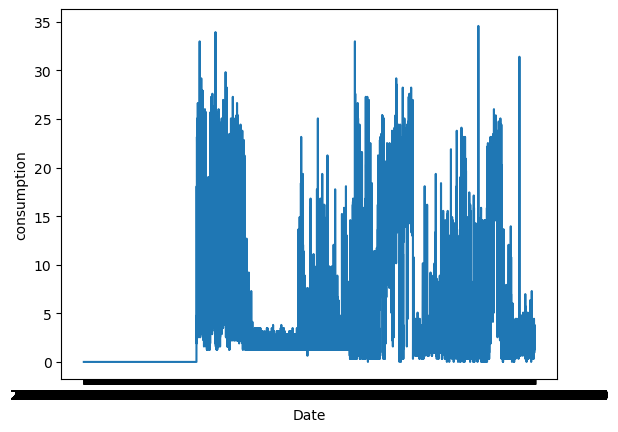

In [10]:
plt.plot(df['Unnamed: 0'],df['consumption'])
plt.xlabel('Date')
plt.ylabel('consumption')

(array([1.1328e+04, 1.1343e+04, 4.1350e+03, 1.2710e+03, 5.3600e+02,
        2.3700e+02, 1.9500e+02, 2.1000e+02, 1.6400e+02, 1.7800e+02,
        1.3100e+02, 4.1500e+02, 1.0470e+03, 1.1470e+03, 1.3640e+03,
        5.5500e+02, 2.2400e+02, 1.6700e+02, 1.3800e+02, 8.4000e+01,
        8.5000e+01, 5.1000e+01, 3.0000e+01, 1.5000e+01, 6.0000e+00,
        4.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([ 0.        ,  1.15270728,  2.30541455,  3.45812183,  4.6108291 ,
         5.76353638,  6.91624365,  8.06895093,  9.22165821, 10.37436548,
        11.52707276, 12.67978003, 13.83248731, 14.98519459, 16.13790186,
        17.29060914, 18.44331641, 19.59602369, 20.74873096, 21.90143824,
        23.05414552, 24.20685279, 25.35956007, 26.51226734, 27.66497462,
        28.8176819 , 29.97038917, 31.12309645, 32.27580372, 33.428511  ,
        34.58121827]),
 <BarContainer object of 30 artists>)

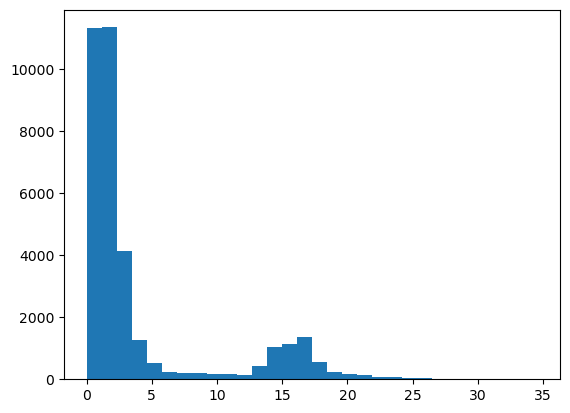

In [11]:
plt.hist(df['consumption'],bins=30)

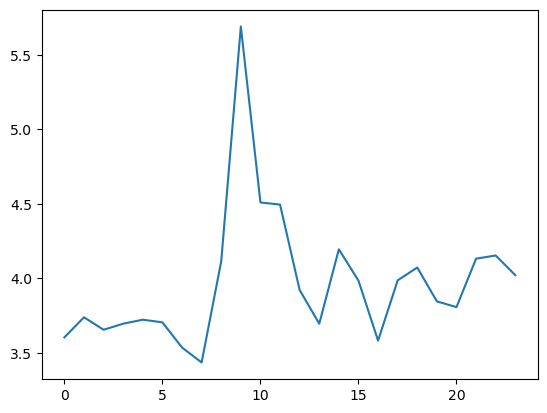

In [17]:
hourly_consumption=df.groupby('hour')['consumption'].mean()

plt.plot(hourly_consumption.index,hourly_consumption.values)

<BarContainer object of 7 artists>

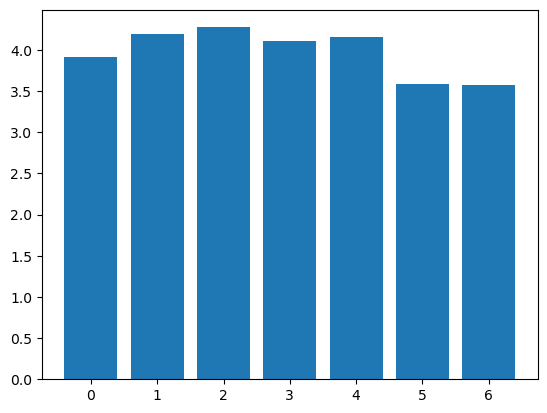

In [18]:
weekly_avg=df.groupby('day_of_week')['consumption'].mean()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.bar(range(7),weekly_avg.values)

<Axes: title={'center': 'consumption'}, xlabel='month'>

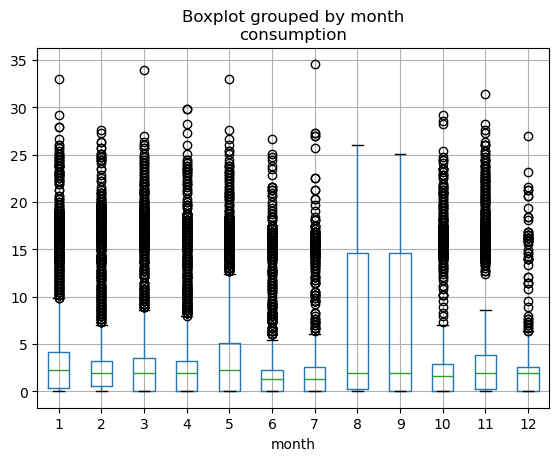

In [19]:
df.boxplot(column='consumption',by='month')

In [21]:
from statsmodels.tsa.stattools import adfuller

In [23]:
result = adfuller(df['consumption'].dropna())
# Print ADF test statistic
print(f"\nADF Statistic: {result[0]:.4f}")
# Print p-value (if < 0.05, series is stationary)
print(f"p-value: {result[1]:.4f}")
# Print interpretation based on p-value
print("Time series is", "stationary" if result[1] < 0.05 else "non-stationary")


ADF Statistic: -7.3001
p-value: 0.0000
Time series is stationary
